In [30]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [31]:
dataset_df = sns.load_dataset('titanic')
dataset_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [32]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [33]:
dataset_df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [34]:
drop_column=dataset_df.drop('deck',axis= 1,inplace= True)


In [35]:
dataset_df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [36]:
drop_column = dataset_df.drop(['age'],axis=1,inplace= True)

In [37]:
dataset_df.isna().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [38]:
dataset_df['embarked'].fillna(dataset_df['embarked'].mode() ,inplace = True)


C:\Users\samiwadho\AppData\Local\Temp\ipykernel_13868\1361805357.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_df['embarked'].fillna(dataset_df['embarked'].mode() ,inplace = True)


In [52]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder for converting categorical labels into numbers

# Loop through each column in the DataFrame
for col in dataset_df.columns:
    # Check if the column's data type is 'object' (usually text) or a 'category'
    if dataset_df[col].dtype == 'object' or dataset_df[col].dtype.name == 'category':
        
        # Make sure all values in the column are of allowed types (str, int, float) to avoid encoding errors
        if dataset_df[col].apply(lambda x: isinstance(x, (str, int, float))).all():
            
            # Convert the column to string type (to ensure uniformity), then apply Label Encoding
            dataset_df[col] = LabelEncoder().fit_transform(dataset_df[col].astype(str))


In [53]:
dataset_df.isna().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

C:\Users\samiwadho\AppData\Local\Temp\ipykernel_13868\1824441245.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


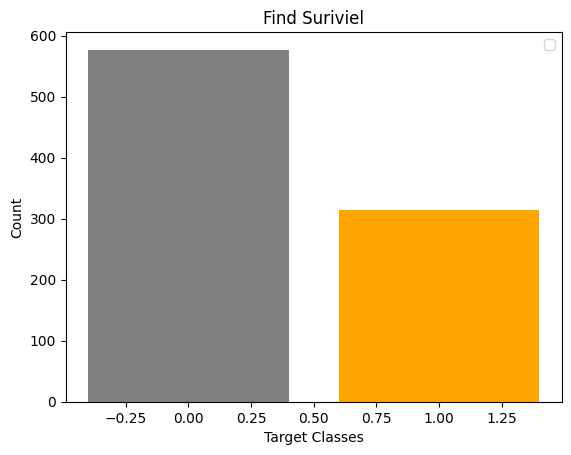

In [54]:
plt.bar(dataset_df['survived'].unique(),dataset_df['sex'].value_counts(),color=['grey','orange'])
plt.title('Find Suriviel')
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.legend()
plt.show()


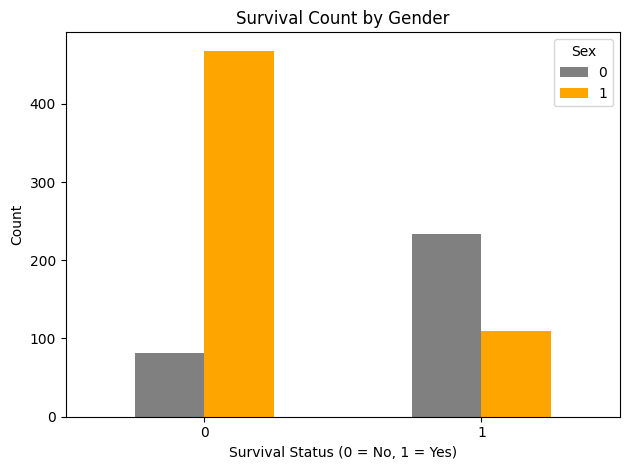

In [55]:
#If you want to see how many males and females survived vs not survived, you need to group by both sex and survived.


# Count of each sex per survival status
survival_sex_counts = dataset_df.groupby(['survived', 'sex']).size().unstack()

# Plotting
survival_sex_counts.plot(kind='bar', color=['grey', 'orange'])
plt.title('Survival Count by Gender')
plt.xlabel('Survival Status (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [56]:
dataset = pd.get_dummies(dataset_df,columns=['sex','alive','pclass','adult_male'])

In [57]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int64  
 3   sibsp        891 non-null    int64  
 4   parch        891 non-null    int64  
 5   fare         891 non-null    float64
 6   embarked     891 non-null    int64  
 7   class        891 non-null    int64  
 8   who          891 non-null    int64  
 9   adult_male   891 non-null    bool   
 10  embark_town  891 non-null    int64  
 11  alive        891 non-null    int64  
 12  alone        891 non-null    bool   
dtypes: bool(2), float64(1), int64(10)
memory usage: 78.4 KB


In [58]:
# Now train the model

y = dataset_df['survived']

X = dataset_df.drop(['survived'],axis =1)
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size= 0.3,random_state=0)

In [62]:

from sklearn.neighbors import KNeighborsClassifier

knn_scores = []
for K in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=K)  # use a lowercase variable name
    knn.fit(X_train, y_train)
    knn_scores.append(knn.score(X_test, y_test))  # don't forget y_test

Text(0.5, 1.0, 'Number of KNN scores for different K values')

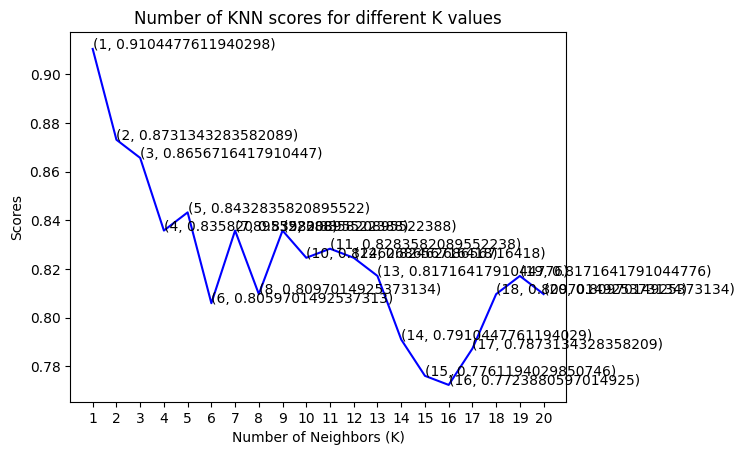

In [63]:

plt.plot([k for k in range(1, 21)], knn_scores, color = 'blue')
for i in range(1,21):
                    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('Number of KNN scores for different K values')

In [64]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[7]*100, 8))


The score for K Neighbors Classifier is 80.97014925373134% with 8 nieghbors.


In [65]:

#Model 2: Decision Tree
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 30)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'DT scores for different number of maximum features')

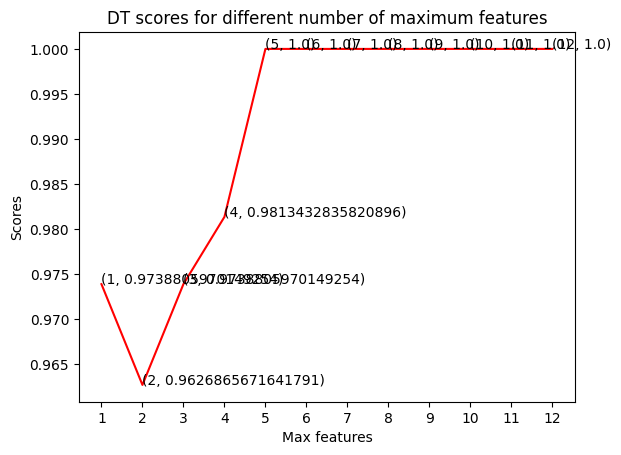

In [66]:

plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'red')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('DT scores for different number of maximum features')